In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob

In [2]:
data_path = './input/lish-moa/'

# load df

In [3]:
# train_df
trn_feature = pd.read_csv(data_path + 'train_features.csv')
print(trn_feature.shape)
trn_feature.sample(10)

(23814, 876)


sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
20470  id_dbbcdd0ae  trt_cp       24      D1  0.3689 -0.5774 -0.0905  0.9942   
20327  id_da284e0d0  trt_cp       48      D2  0.2387  0.5192 -0.0479  1.0210   
4009   id_2aeafc577  trt_cp       72      D2 -1.3410 -0.1906  1.0980 -0.7431   
4594   id_31778b235  trt_cp       48      D1 -0.0001 -0.5660  0.2412  0.6859   
19383  id_d007e09fe  trt_cp       48      D1 -0.6741  0.5950 -0.7467 -0.5905   
11484  id_7bcefd5e4  trt_cp       72      D2  0.4434  1.3330  0.3307 -0.3120   
22685  id_f3a99b92c  trt_cp       24      D2 -1.1920  0.0000  0.3337  1.3520   
2616   id_1bf1e5331  trt_cp       72      D1  0.8372  0.6053  0.2236  0.1230   
12819  id_8a078faa8  trt_cp       24      D2  0.4252  0.9844 -0.9103  0.1909   
11016  id_7692cb498  trt_cp       48      D2  0.1544 -0.0404 -0.6385  0.2899   

          g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
20470  0.1446  0.2783  ... -0.2420 -0.1179  0.3410 -0.0565 -0.3012  0.3349   
20327  0.0042 -0.4222  ...  0.4620 -0.0472 -0.4987  0.6155 -0.1233 -0.5832   
4009  -0.3853  1.3370  ... -3.1150 -2.7070 -0.8390 -2.1890 -1.8910 -3.2990   
4594   0.3601 -0.1715  ... -1.1680 -0.8372  0.6442  0.3277  0.3961 -0.6222   
19383  0.0111  0.0411  ... -0.2890 -0.4526  0.1655  0.5557  0.5914  0.4507   
11484  0.1484 -3.2530  ...  0.5526 -0.3852  0.2258  0.5409  0.3221 -0.4270   
22685 -1.6350  0.1348  ...  1.0230 -0.7835  0.0578  0.3239  1.6690 -0.0783   
2616   0.5132 -1.3810  ...  0.0958  0.4812  0.6409 -0.6900  1.0310  0.0319   
12819  0.7476  0.0256  ... -0.0505  0.0226 -0.0808 -2.1250 -0.8821 -1.4150   
11016 -0.4159  0.4516  ...  0.9079 -0.1250  0.1587  0.4036 -0.2953  1.3600   

         c-96    c-97    c-98    c-99  
20470 -1.3070  0.5372  0.6713 -0.0484  
20327 -0.2225 -0.6303  1.1170 -0.6633  
4009  -2.0730 -1.6390 -3.5290 -1.1330  
4594  -0.5657  0.5400  0.1306 -0.2657  
19383 -0.7006  0.9449  0.5420 -0.1452  
11484 -0.6901 -0.7355 -0.3678  0.9273  
22685  1.2170  0.1671 -0.6978 -0.7388  
2616   0.6142  0.6620 -0.0778  0.5094  
12819 -0.3495  0.2705 -0.2882  0.1019  
11016  0.2809  0.5981  0.1721  0.8386  

[10 rows x 876 columns]

In [4]:
# additional (optional) set of MoA labels, it would not score for the competition
trn_tar_nonsc_df = pd.read_csv(data_path + 'train_targets_nonscored.csv')
print(trn_tar_nonsc_df.shape)
trn_tar_nonsc_df.sample(1)

(23814, 403)


sig_id  abc_transporter_expression_enhancer  abl_inhibitor  \
17460  id_bb720d2b0                                    0              0   

       ace_inhibitor  acetylcholine_release_enhancer  \
17460              0                               0   

       adenosine_deaminase_inhibitor  adenosine_kinase_inhibitor  \
17460                              0                           0   

       adenylyl_cyclase_inhibitor  age_inhibitor  \
17460                           0              0   

       alcohol_dehydrogenase_inhibitor  ...  ve-cadherin_antagonist  \
17460                                0  ...                       0   

       vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
17460                                          0                     0   

       voltage-gated_calcium_channel_ligand  \
17460                                     0   

       voltage-gated_potassium_channel_activator  \
17460                                          0   

       voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
17460                                     0                               0   

       wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
17460            0                           0               0  

[1 rows x 403 columns]

In [5]:
# train_df_target
trn_tar_df = pd.read_csv(data_path + 'train_targets_scored.csv')
print(trn_tar_df.shape)
trn_tar_df.sample(10)

(23814, 207)


sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
19254  id_ce9f9eec0                            0                       0   
20548  id_dc790111c                            0                       0   
1828   id_13b147178                            0                       0   
17453  id_bb68b664c                            0                       0   
13713  id_93f466bd7                            0                       0   
22400  id_f0927c3a1                            0                       0   
8235   id_589bff935                            0                       0   
20935  id_e085f2773                            0                       0   
4619   id_31be4de14                            0                       0   
3692   id_278df9358                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
19254               0                               0   
20548               0                               0   
1828                0                               0   
17453               0                               0   
13713               0                               0   
22400               0                               0   
8235                0                               0   
20935               0                               0   
4619                0                               0   
3692                0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
19254                                  0                               0   
20548                                  0                               0   
1828                                   0                               0   
17453                                  0                               0   
13713                                  0                               0   
22400                                  0                               0   
8235                                   0                               0   
20935                                  0                               0   
4619                                   0                               0   
3692                                   0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
19254                           0                              0   
20548                           0                              0   
1828                            0                              0   
17453                           0                              0   
13713                           0                              0   
22400                           0                              0   
8235                            0                              0   
20935                           0                              0   
4619                            0                              0   
3692                            0                              0   

       adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
19254                           0  ...                                      0   
20548                           0  ...                                      0   
1828                            0  ...                                      0   
17453                           0  ...                                      0   
13713                           0  ...                                      0   
22400                           0  ...                                      0   
8235                            0  ...                                      0   
20935                           0  ...                                      0   
4619                            0  ...                                      0   
3692                            0  ...                                      0   

       trpv_agonist  trpv_antagonist  tubulin_inhibitor  \
19254      

In [6]:
# test_df
test_df = pd.read_csv(data_path + 'test_features.csv')
print(test_df.shape)
test_df.sample(10)

(3982, 876)


sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
2257  id_905d0e212  trt_cp       48      D2 -0.9360  1.8380 -2.7340  0.6773   
201   id_0dd839d48  trt_cp       48      D1 -0.1517  0.5401  0.0309 -1.1530   
3942  id_fcb6dfb60  trt_cp       24      D2  5.3050  2.2940 -0.2339  3.0080   
2764  id_b1a7fb7de  trt_cp       48      D2 -0.1349  0.0675  0.3404  0.4345   
2887  id_b9e5ced52  trt_cp       72      D1 -0.0866 -0.2533  0.1933  0.0000   
3791  id_f37db2824  trt_cp       48      D2  0.2692 -0.2642 -0.2436 -0.1202   
848   id_37ca568be  trt_cp       72      D1  0.4954  0.9250 -0.5068 -0.3086   
1504  id_60b05dbae  trt_cp       48      D2  6.4070  1.5620 -4.2330  4.3910   
1440  id_5c5386682  trt_cp       72      D1 -0.7803 -0.1812 -0.4118  1.8300   
2956  id_beb6a8968  trt_cp       72      D1  6.5790 -1.0150  1.9590  0.3774   

         g-4     g-5  ...     c-90     c-91     c-92     c-93     c-94  \
2257 -0.0804 -0.8559  ...  -0.4113  -1.0840   1.0800  -0.7747  -0.7974   
201   0.9070 -2.2430  ...  -2.0180  -4.2640  -3.0500  -4.7990  -2.9540   
3942  3.4670 -2.3880  ...  -9.8960  -7.5570  -8.0150 -10.0000  -8.2230   
2764 -0.0295  0.4669  ...   1.1030   1.0780   0.6607   0.5191   0.8287   
2887  0.6021 -0.1455  ...  -0.4428   0.3583   0.7948   0.6410   0.5153   
3791 -0.1789  0.0580  ...   0.8359   0.4493  -0.6298   0.8145   1.1270   
848  -0.0049 -0.3686  ...  -0.2865  -0.6646   0.2844  -0.4301  -0.2354   
1504  2.4820 -5.5820  ...  -6.4730   0.5521  -4.2640  -3.6620  -0.8903   
1440  0.7223  0.3108  ...  -0.7468  -0.7722  -0.4913   0.2629   0.0609   
2956  3.2230 -1.1360  ... -10.0000 -10.0000 -10.0000 -10.0000 -10.0000   

        c-95     c-96    c-97     c-98    c-99  
2257 -1.9980  -0.4249 -0.4652  -0.0872 -0.5919  
201  -3.3700  -4.3190 -1.6640  -3.7520 -1.9750  
3942 -3.9610  -8.3930 -6.0580  -4.8560 -3.1330  
2764 -0.9734   1.4470  0.3779  -0.6112  1.1170  
2887 -0.1681   0.6655 -0.6182   0.4665  0.3649  
3791 -0.3272   0.2500  0.7358   1.1540  0.5727  
848  -0.2581   0.7121  1.0560  -0.0543  0.4397  
1504 -4.5430  -5.7180  0.1581  -7.8070 -1.6340  
1440  0.8861  -1.4370 -0.5927  -1.1760  0.8977  
2956 -8.0460 -10.0000 -7.9050 -10.0000 -8.6950  

[10 rows x 876 columns]

In [7]:
# sub_df
sub_df = pd.read_csv(data_path + 'sample_submission.csv')
print(sub_df.shape)
sub_df.sample(10)

(3982, 207)


sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
1212  id_4e8186877                          0.5                     0.5   
3918  id_fbbafa7a7                          0.5                     0.5   
2482  id_9eca355fd                          0.5                     0.5   
3900  id_faba27784                          0.5                     0.5   
2461  id_9dac3caad                          0.5                     0.5   
3513  id_e29f92977                          0.5                     0.5   
381   id_193bb5157                          0.5                     0.5   
94    id_06816b56c                          0.5                     0.5   
3843  id_f6dcfdcbb                          0.5                     0.5   
2572  id_a43d7683b                          0.5                     0.5   

      acat_inhibitor  acetylcholine_receptor_agonist  \
1212             0.5                             0.5   
3918             0.5                             0.5   
2482             0.5                             0.5   
3900             0.5                             0.5   
2461             0.5                             0.5   
3513             0.5                             0.5   
381              0.5                             0.5   
94               0.5                             0.5   
3843             0.5                             0.5   
2572             0.5                             0.5   

      acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
1212                                0.5                             0.5   
3918                                0.5                             0.5   
2482                                0.5                             0.5   
3900                                0.5                             0.5   
2461                                0.5                             0.5   
3513                                0.5                             0.5   
381                                 0.5                             0.5   
94                                  0.5                             0.5   
3843                                0.5                             0.5   
2572                                0.5                             0.5   

      adenosine_receptor_agonist  adenosine_receptor_antagonist  \
1212                         0.5                            0.5   
3918                         0.5                            0.5   
2482                         0.5                            0.5   
3900                         0.5                            0.5   
2461                         0.5                            0.5   
3513                         0.5                            0.5   
381                          0.5                            0.5   
94                           0.5                            0.5   
3843                         0.5                            0.5   
2572                         0.5                            0.5   

      adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
1212                         0.5  ...                                    0.5   
3918                         0.5  ...                                    0.5   
2482                         0.5  ...                                    0.5   
3900                         0.5  ...                                    0.5   
2461                         0.5  ...                                    0.5   
3513                         0.5  ...                                    0.5   
381                          0.5  ...                                    0.5   
94                           0.5  ...                                    0.5   
3843                         0.5  ...                                    0.5   
2572                         0.5  ...                                    0.5   

      trpv_agonist  trpv_antagonist  tubulin_inhibitor  \
1212           0.5              0.5                0.5   
3918    

In [8]:
# make sure all keys are same
all(test_df.keys() == trn_feature.keys()), all(trn_tar_df.keys() == sub_df.keys())

(True, True)

# catgorical feature

In [9]:
# plot sunburst
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

fig = px.sunburst(trn_feature, path=['cp_type', 'cp_time', 'cp_dose'])
fig

In [10]:
def bar_show_text(ax, total):
    for p in ax.patches:
        percentage = f'{p.get_height() / total : .2%}'
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

(cp_type
 trt_cp         21948
 ctl_vehicle     1866
 dtype: int32,
 cp_type
 trt_cp         3624
 ctl_vehicle     358
 dtype: int32)

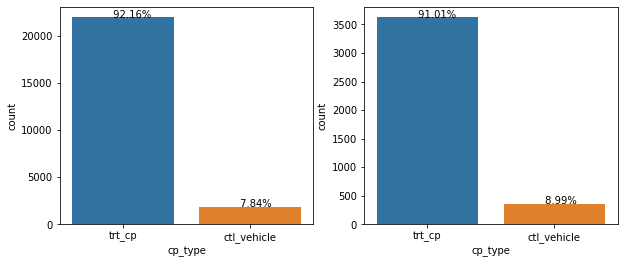

In [11]:
# countplot for cp_type feature
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax0 = sns.countplot(x='cp_type', data=trn_feature, ax=ax[0])
ax1 = sns.countplot(x='cp_type', data=test_df, ax=ax[1])

bar_show_text(ax0, len(trn_feature))
bar_show_text(ax1, len(test_df))    

(trn_feature.groupby('cp_type', sort=False).count().mean(1).astype(int),
 test_df.groupby('cp_type', sort=False).count().mean(1).astype(int))

(cp_time
 24    7772
 48    8250
 72    7792
 dtype: int32,
 cp_time
 24    1300
 48    1377
 72    1305
 dtype: int32)

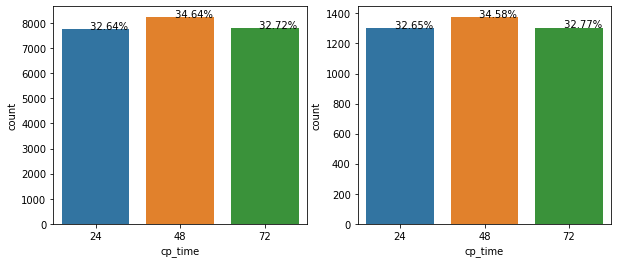

In [12]:
# countplot for cp_time feature
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax0 = sns.countplot(x='cp_time', data=trn_feature, ax=ax[0])
ax1 = sns.countplot(x='cp_time', data=test_df, ax=ax[1])

bar_show_text(ax0, len(trn_feature))
bar_show_text(ax1, len(test_df))    

(trn_feature.groupby('cp_time').count().mean(1).astype(int), 
test_df.groupby('cp_time').count().mean(1).astype(int))

(cp_dose
 D1    12147
 D2    11667
 dtype: int32,
 cp_dose
 D1    2027
 D2    1955
 dtype: int32)

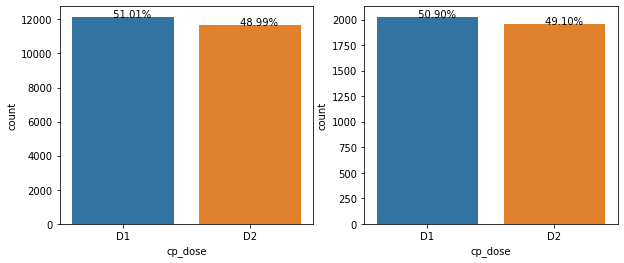

In [13]:
# countplot for cp_dose feature
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax0 = sns.countplot(x='cp_dose', data=trn_feature, ax=ax[0])
ax1 = sns.countplot(x='cp_dose', data=test_df, ax=ax[1])

bar_show_text(ax0, len(trn_feature))
bar_show_text(ax1, len(test_df))  

(trn_feature.groupby('cp_dose').count().mean(1).astype(int), 
test_df.groupby('cp_dose').count().mean(1).astype(int))

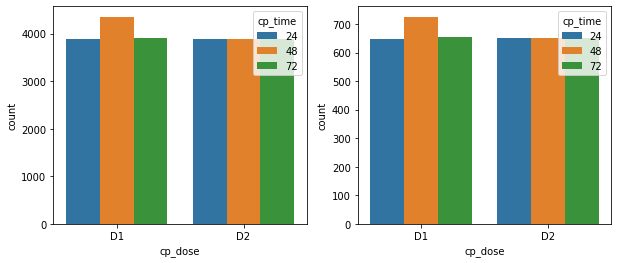

In [14]:
# cp_dose with cp_time
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x='cp_dose', hue='cp_time' , data=trn_feature, ax=ax[0])
sns.countplot(x='cp_dose', hue='cp_time' , data=test_df, ax=ax[1])

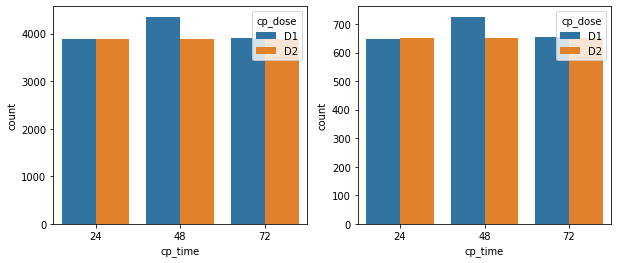

In [15]:
# cp_time with cp_dose
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x='cp_time', hue='cp_dose' , data=trn_feature, ax=ax[0])
sns.countplot(x='cp_time', hue='cp_dose' , data=test_df, ax=ax[1])

In [16]:
# test_df and train_df don't have same id.
for i in range(len(test_df.sig_id)): assert test_df.sig_id.iloc[i] not in trn_feature.sig_id

# sample some numerical feature distribution

In [17]:
genes = [col for col in trn_feature.columns if col.startswith('g-')]
cells = [col for col in trn_feature.columns if col.startswith('c-')]
len(genes), len(cells)

(772, 100)

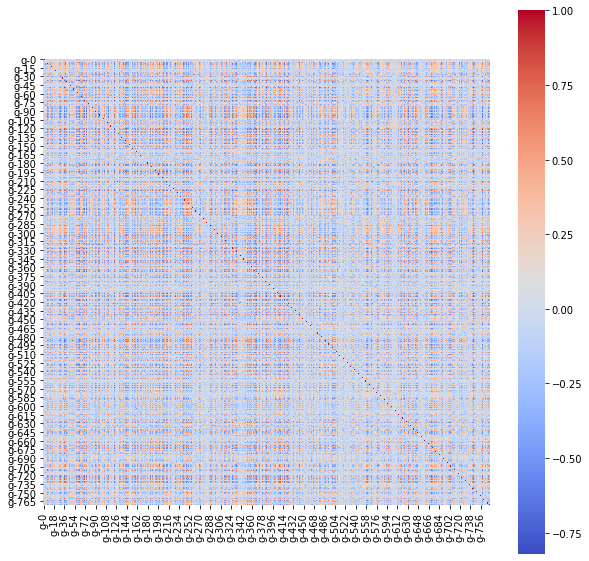

In [18]:
# genes feature correlation
plt.figure(figsize=(10, 10))
sns.heatmap(trn_feature[genes].corr(),
            square=True,
            cmap='coolwarm')  

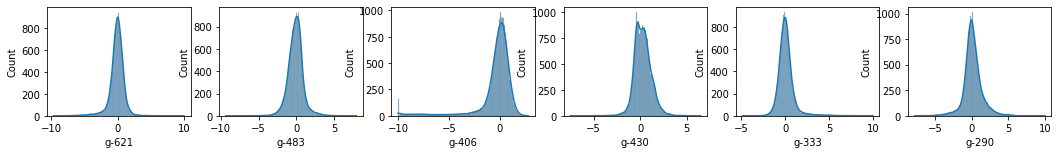

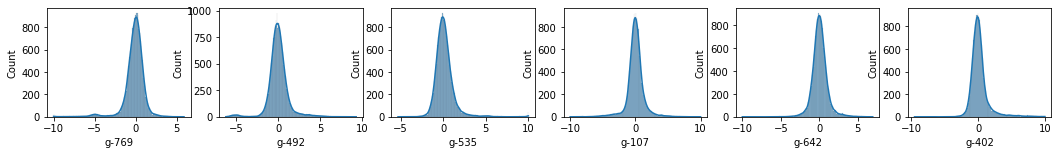

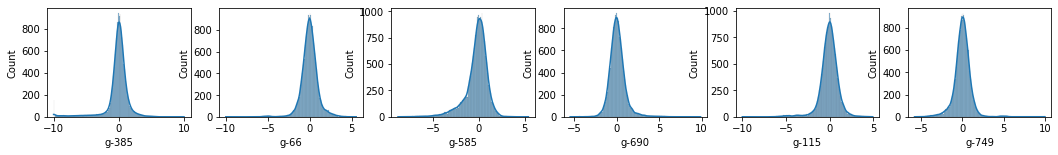

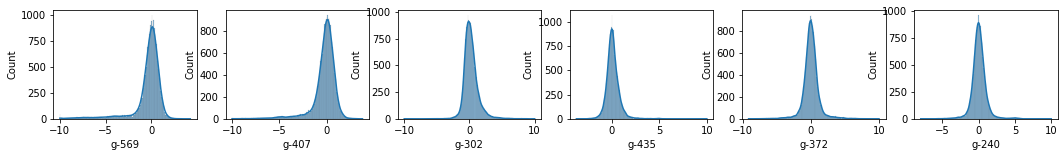

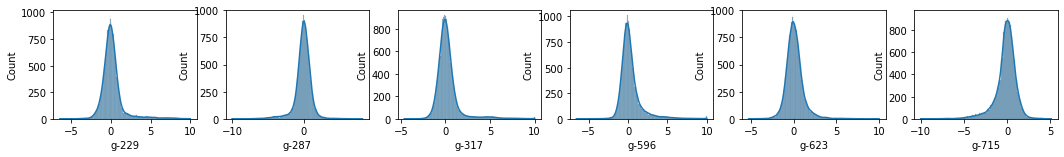

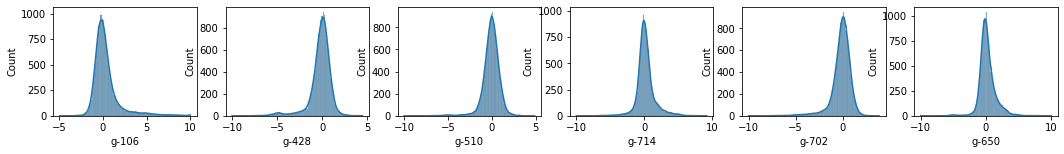

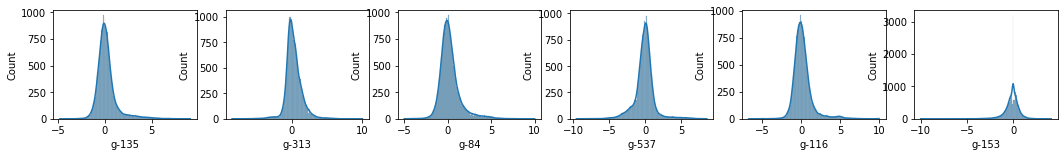

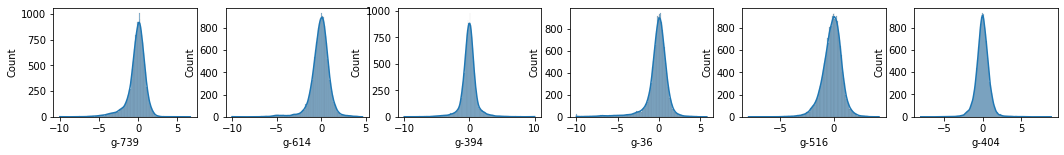

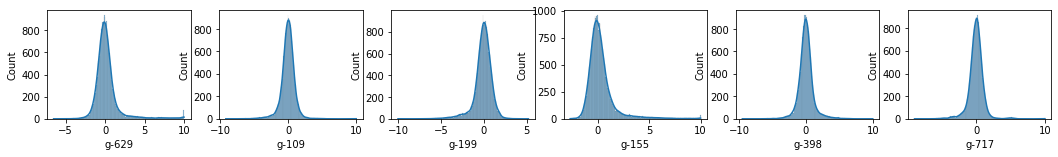

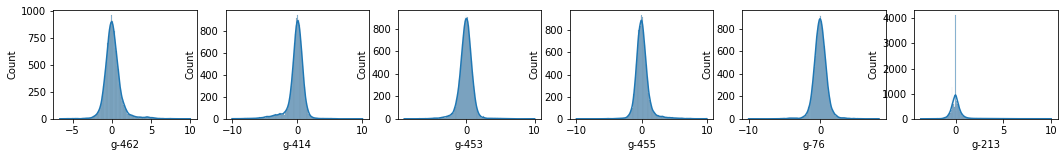

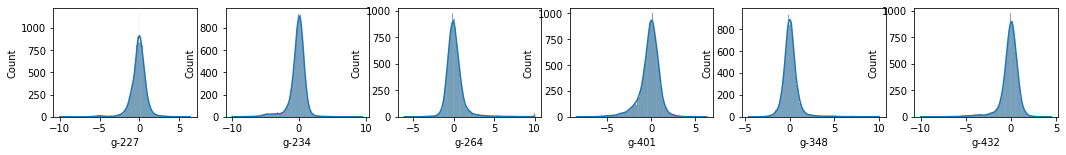

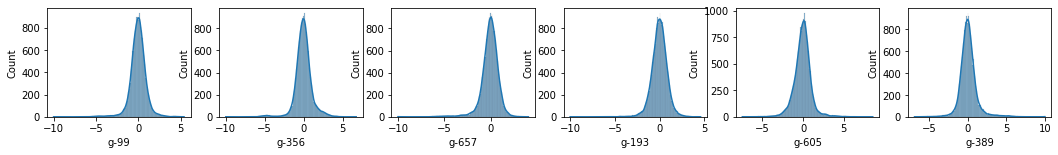

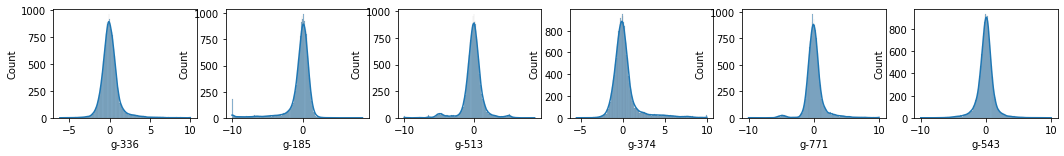

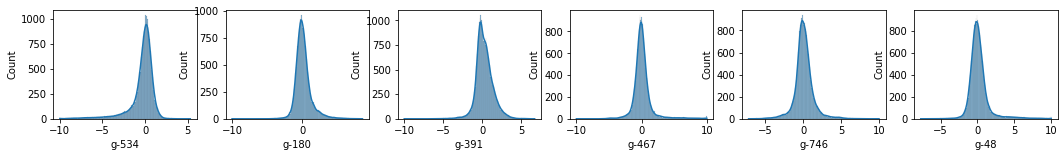

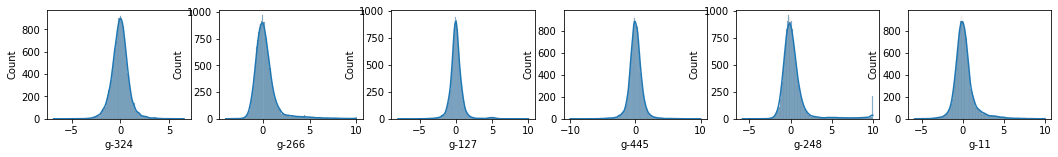

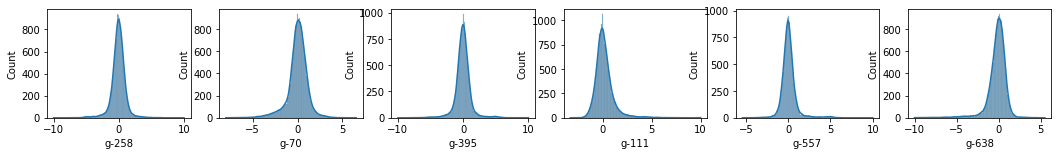

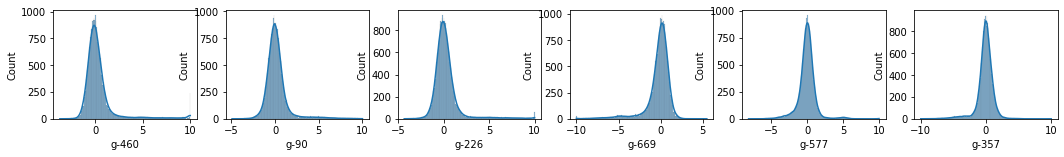

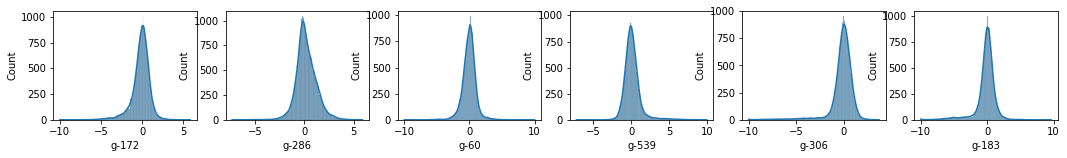

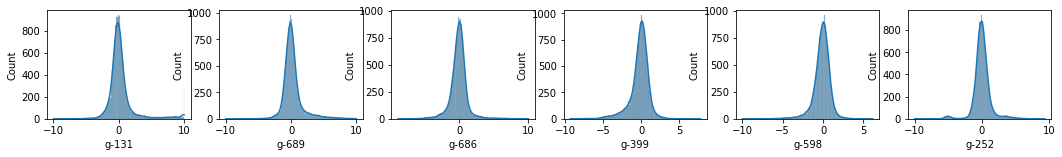

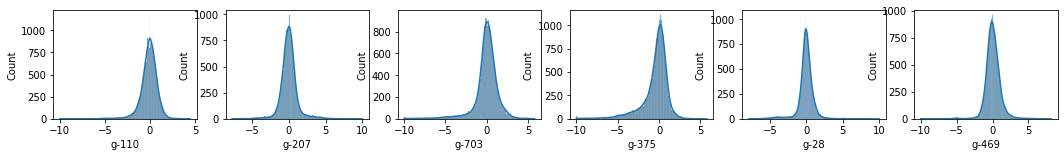

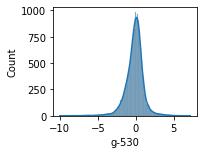

In [19]:
# genes from train_df
np.random.seed(2020)
rand_idx = np.random.permutation(range(len(genes)))
thres = 120 # len(genes)
i = 0
break_flag = False

while True:
    plt.figure(figsize=(18, 2))
    for j in range(6):
        plt.subplot(1, 6, j+1)
        sns.histplot(trn_feature[genes[rand_idx[i]]], kde=True)
        if i== thres: break_flag = True
        if break_flag: break
        i += 1
    plt.show()
    if break_flag: break

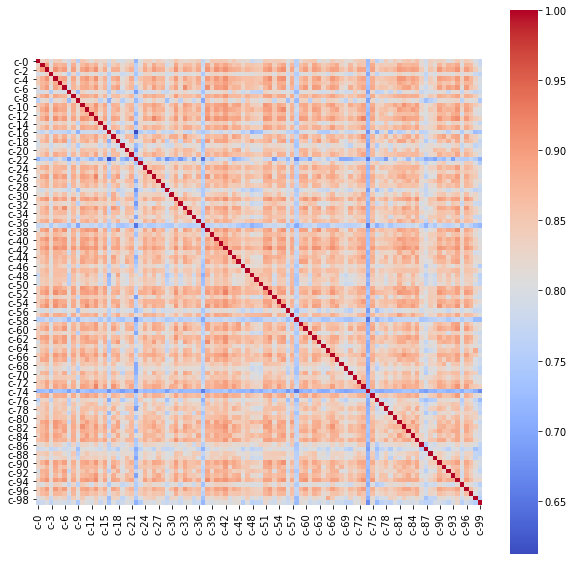

In [20]:
# cells feature correlation
plt.figure(figsize=(10, 10))
sns.heatmap(trn_feature[cells].corr(),
            square=True,
            cmap='coolwarm')  

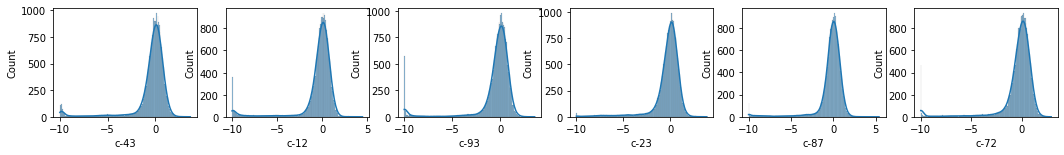

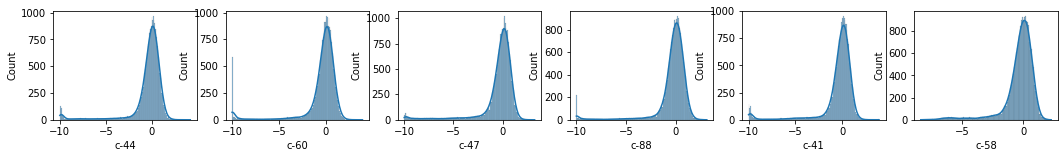

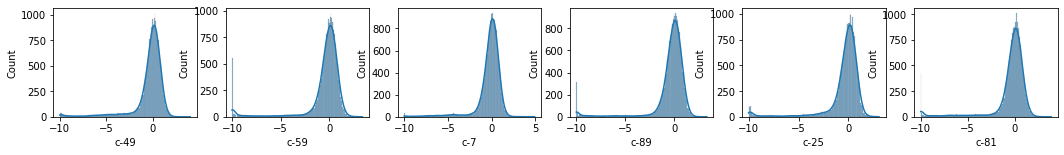

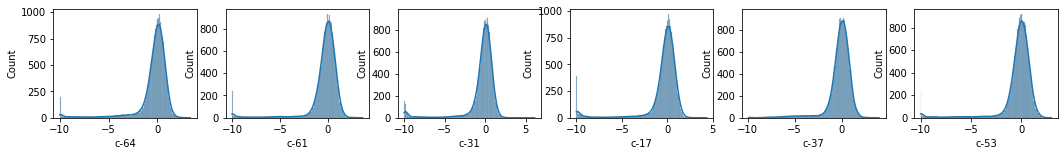

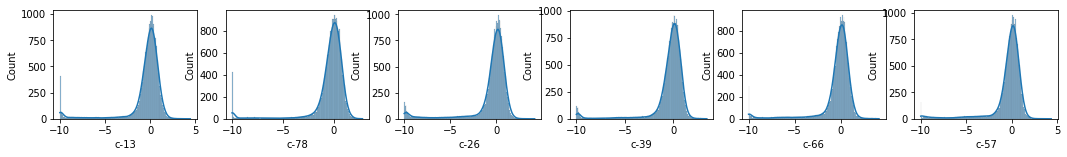

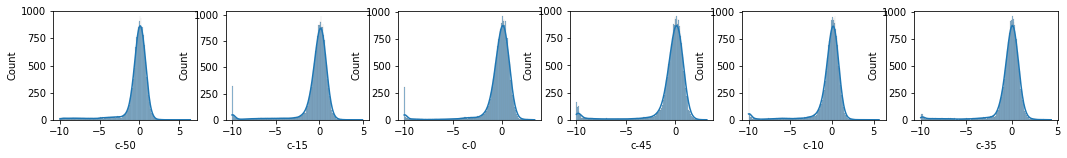

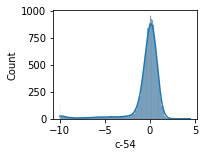

In [21]:
# cells from train_df
np.random.seed(2020)
rand_idx = np.random.permutation(range(len(cells)))
thres = 36
i = 0
break_flag = False

while True:
    plt.figure(figsize=(18, 2))
    for j in range(6):
        plt.subplot(1, 6, j+1)
        sns.histplot(trn_feature[cells[rand_idx[i]]], kde=True)
        if i== thres: break_flag = True
        if break_flag: break
        i += 1
    plt.show()
    if break_flag: break

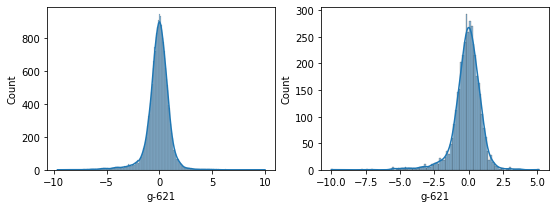

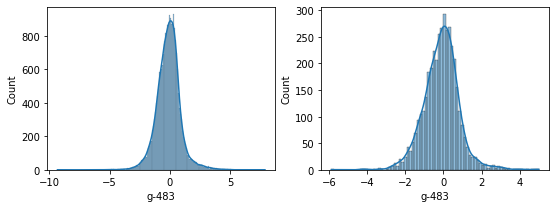

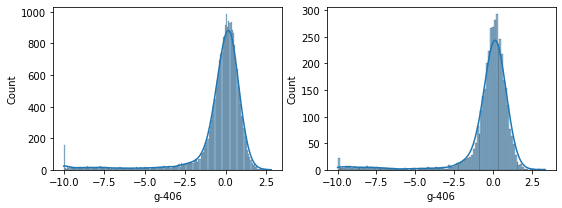

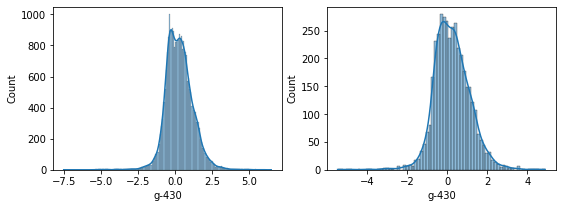

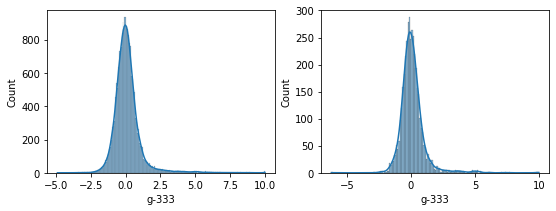

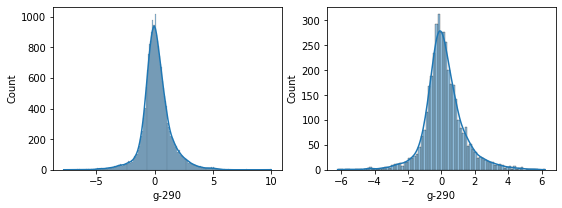

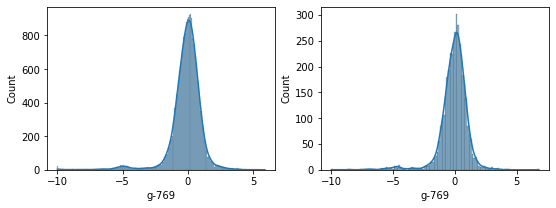

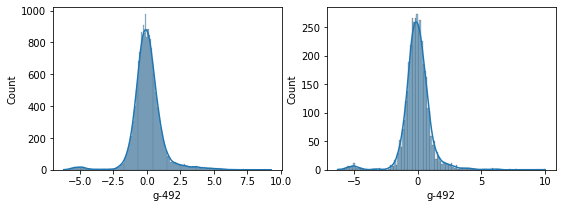

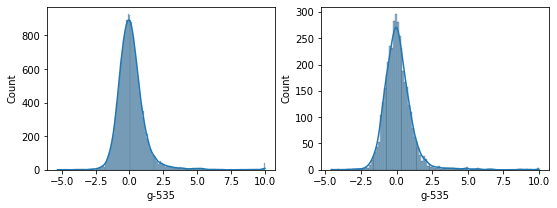

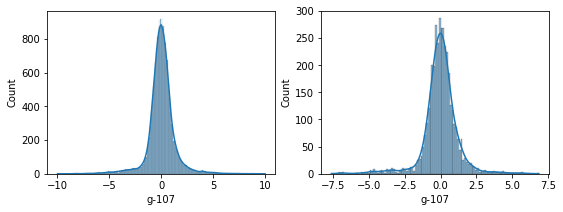

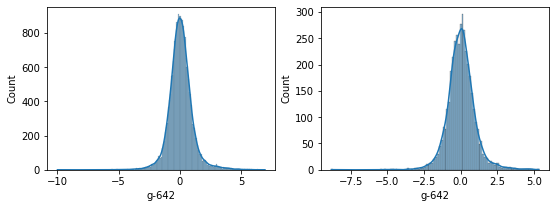

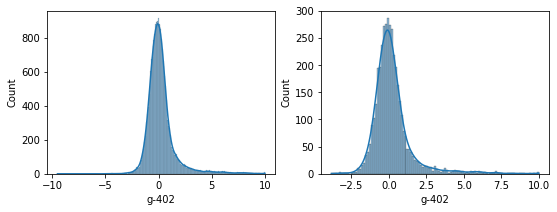

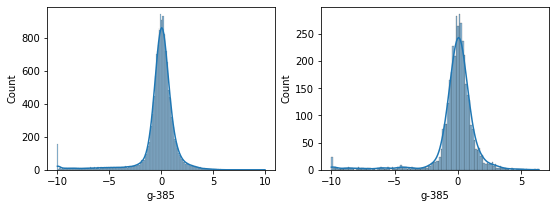

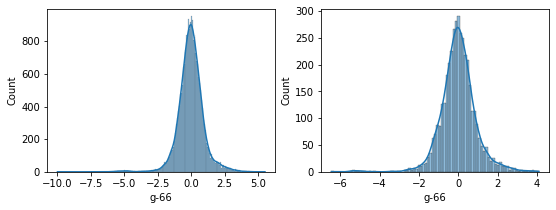

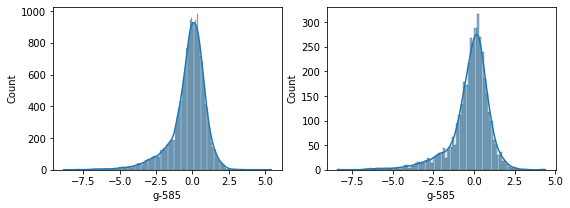

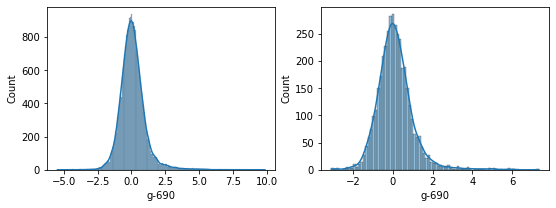

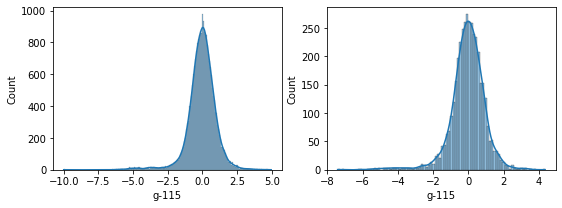

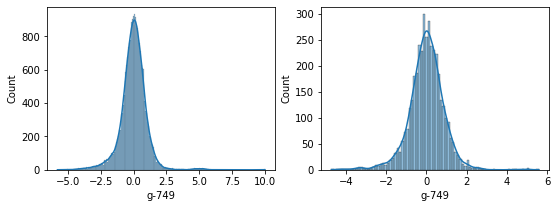

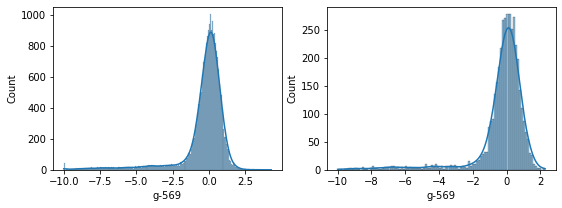

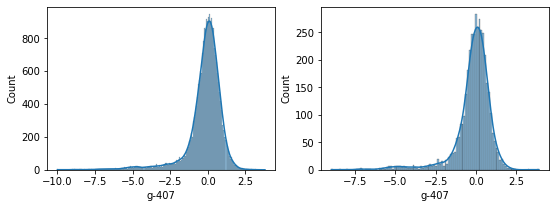

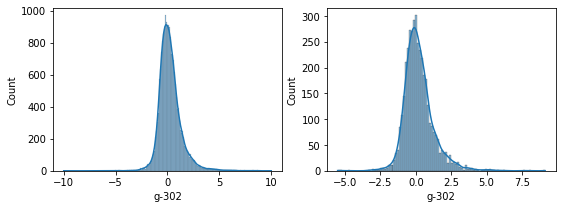

In [22]:
# compare some of genes dist between train and test
np.random.seed(2020)
rand_idx = np.random.permutation(range(len(genes)))
thres = 20 # len(genes)
i = 0
break_flag = False

while True:
    plt.figure(figsize=(9, 3))
    
    plt.subplot(1, 2, 1)
    sns.histplot(trn_feature[genes[rand_idx[i]]], kde=True)
    plt.subplot(1, 2, 2)
    sns.histplot(test_df[genes[rand_idx[i]]], kde=True)   
    
    if i== thres: break_flag = True
    if break_flag: break
    i += 1
    plt.show()
    if break_flag: break

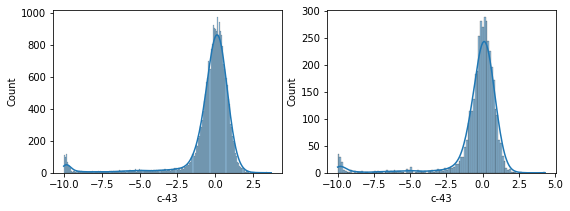

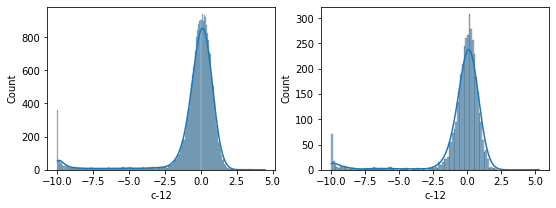

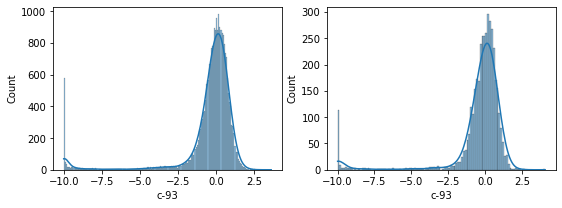

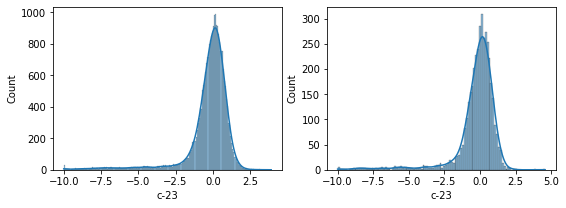

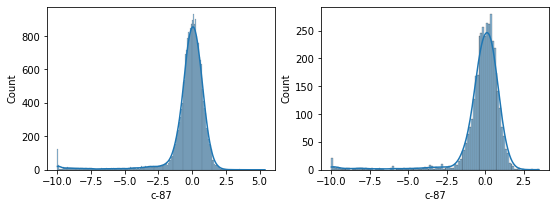

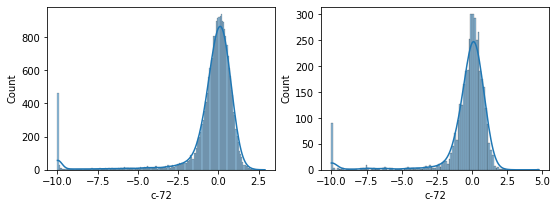

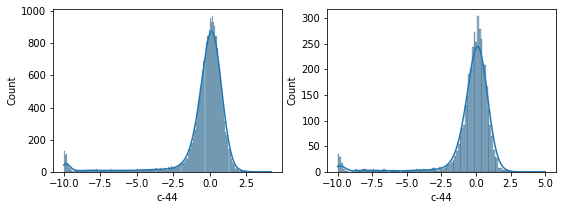

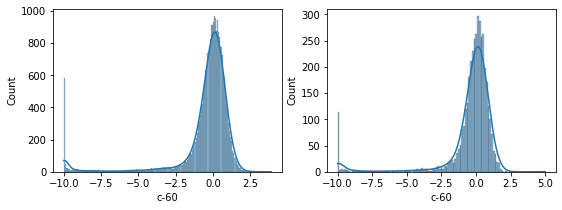

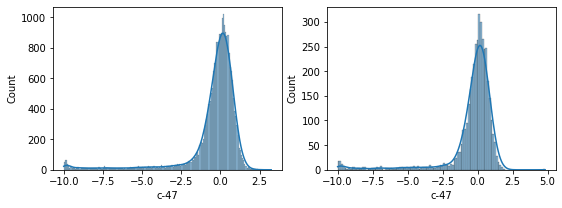

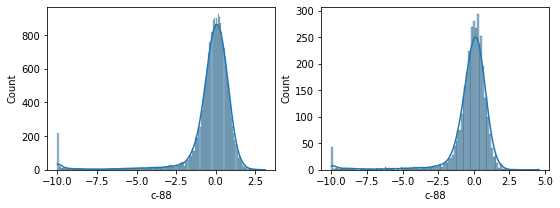

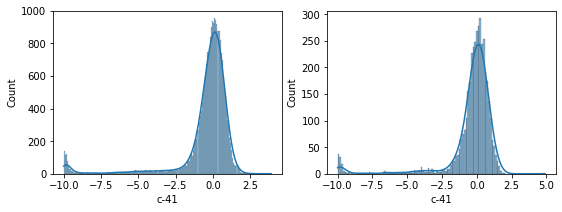

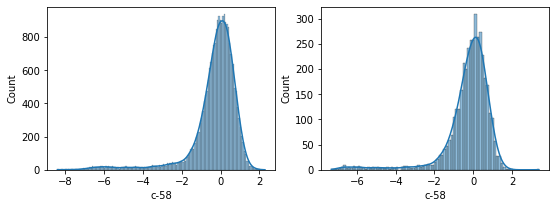

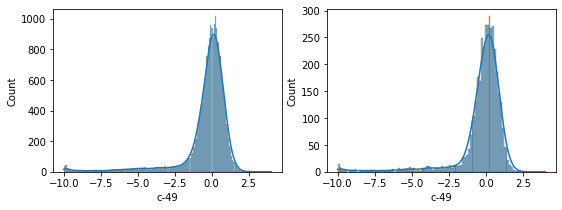

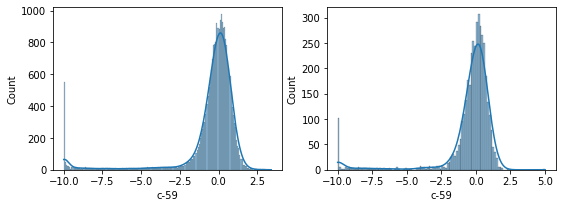

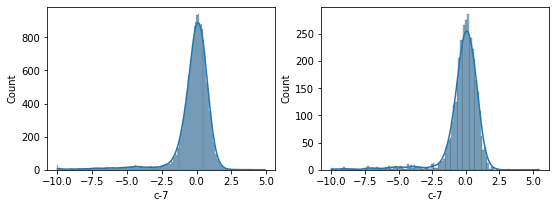

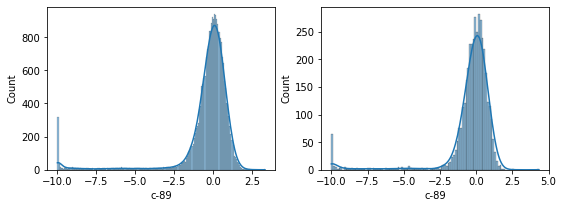

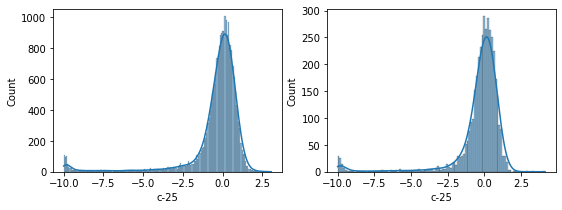

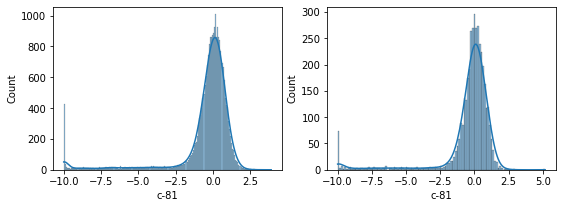

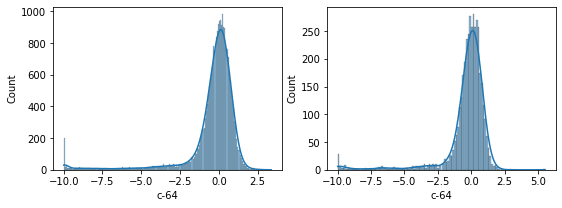

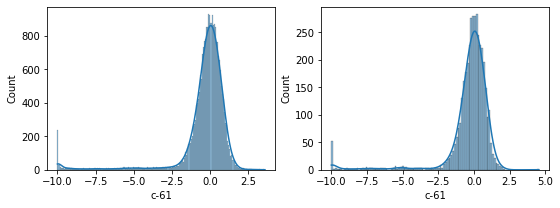

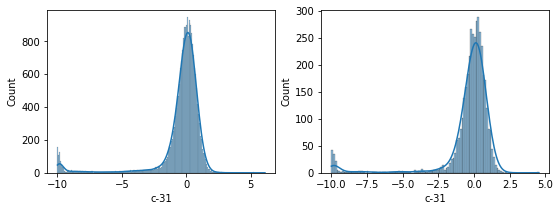

In [23]:
# compare some of cells dist between train and test
np.random.seed(2020)
rand_idx = np.random.permutation(range(len(cells)))
thres = 20 # len(genes)
i = 0
break_flag = False

while True:
    plt.figure(figsize=(9, 3))
    
    plt.subplot(1, 2, 1)
    sns.histplot(trn_feature[cells[rand_idx[i]]], kde=True)
    plt.subplot(1, 2, 2)
    sns.histplot(test_df[cells[rand_idx[i]]], kde=True)   
    
    if i== thres: break_flag = True
    if break_flag: break
    i += 1
    plt.show()
    if break_flag: break

# target

In [24]:
y_keys = list(trn_tar_df.keys())[1:];

In [25]:
y_trn = trn_tar_df.values[:, 1:]

y_axis: [9367, 12532, 1538, 303, 55, 13, 0, 6]


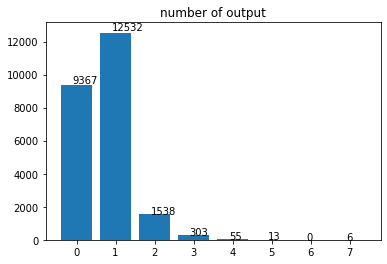

518 [0 0 0 0 1]
11052 [0 0 0 0 1]
17605 [0 0 0 0 1]
20524 [0 0 0 0 1]
8175 [0 0 0 0 0]
18461 [0 0 0 0 0]
17198 [0 0 0 1 1]
3364 [0 0 0 1 1]
6737 [0 0 0 0 1]
13455 [0 0 0 0 0]
13066 [0 0 0 1 1]
8729 [0 0 0 0 0]
12948 [0 0 0 0 1]
12431 [0 0 0 1 1]
23284 [0 0 0 0 0]
11481 [0 0 0 0 1]
20658 [0 0 0 0 1]
15425 [0 0 0 0 0]
11126 [0 0 0 0 1]
8259 [0 0 0 0 1]
11533 [0 0 0 0 0]
23557 [0 0 0 0 0]
181 [0 0 0 0 1]
16986 [0 0 0 0 0]
6055 [0 0 0 0 0]
4778 [0 0 0 0 1]
18120 [0 0 0 0 0]
9015 [0 0 0 0 0]
12776 [0 0 0 0 0]
10391 [0 0 0 0 0]
6314 [0 0 0 0 1]
11983 [0 0 1 1 1]
10499 [0 0 0 0 0]
3729 [0 0 0 0 1]
8438 [0 0 0 0 1]
5384 [0 0 0 0 0]
21937 [0 0 0 0 0]
2911 [0 0 0 0 0]
1927 [0 0 0 0 1]
11760 [0 0 0 0 0]
9779 [0 0 0 0 0]
6058 [0 0 0 0 1]
22035 [0 0 0 0 1]
12704 [0 0 0 0 0]
16750 [0 0 0 0 1]
23549 [0 0 0 1 1]
4993 [0 0 0 0 1]
18469 [0 0 0 0 0]
2139 [0 0 0 0 0]
12477 [0 0 0 0 1]


In [26]:
# multi label, and many sample output nothing!
thres = 50

x_axis = list(range(max(np.sum(y_trn == 1, axis=1)) + 1))
y_axis = [sum(np.sum(y_trn == 1, axis=1) == i) for i in x_axis]

print('y_axis:', y_axis)
figure, ax = plt.subplots()
plt.bar(x_axis, y_axis)
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height() * 1.01
    ax.annotate(y_axis[i], (x, y))

plt.title('number of output')
plt.show()

rand_rdx = np.random.permutation(range(len(y_trn)))[:thres]
for i in rand_rdx: print(i, y_trn[i][np.argsort(y_trn[i])[-5:]])

In [27]:
where_label = np.where(y_trn==1)[1]

count = np.zeros((len(y_keys)))
for i in range(len(y_keys)): count[i] = sum(where_label == i)

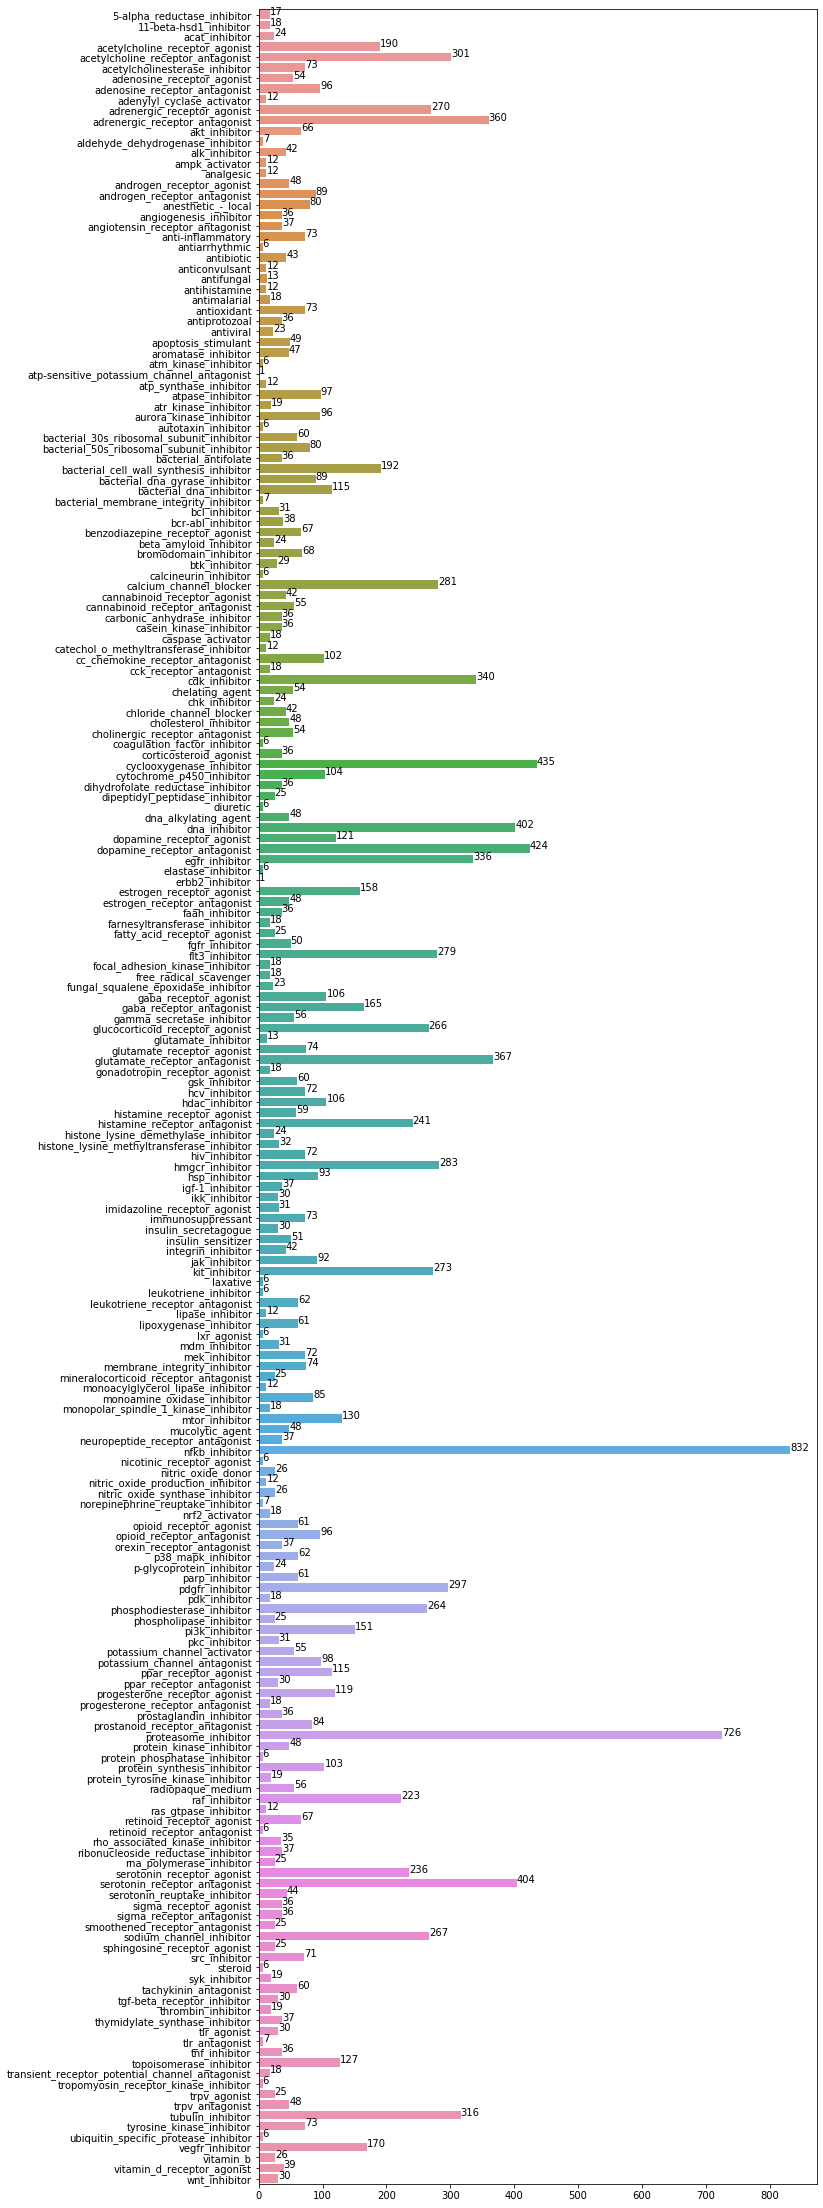

In [28]:
# without sort
plt.figure(figsize=(10, 40))
ax = sns.barplot(x=count, y=y_keys)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height / 2
    ax.annotate(int(count[i]), (x, y))
plt.show()

# {x: int(y) for x, y in zip(y_keys, count)}

<Figure size 1080x2520 with 0 Axes>

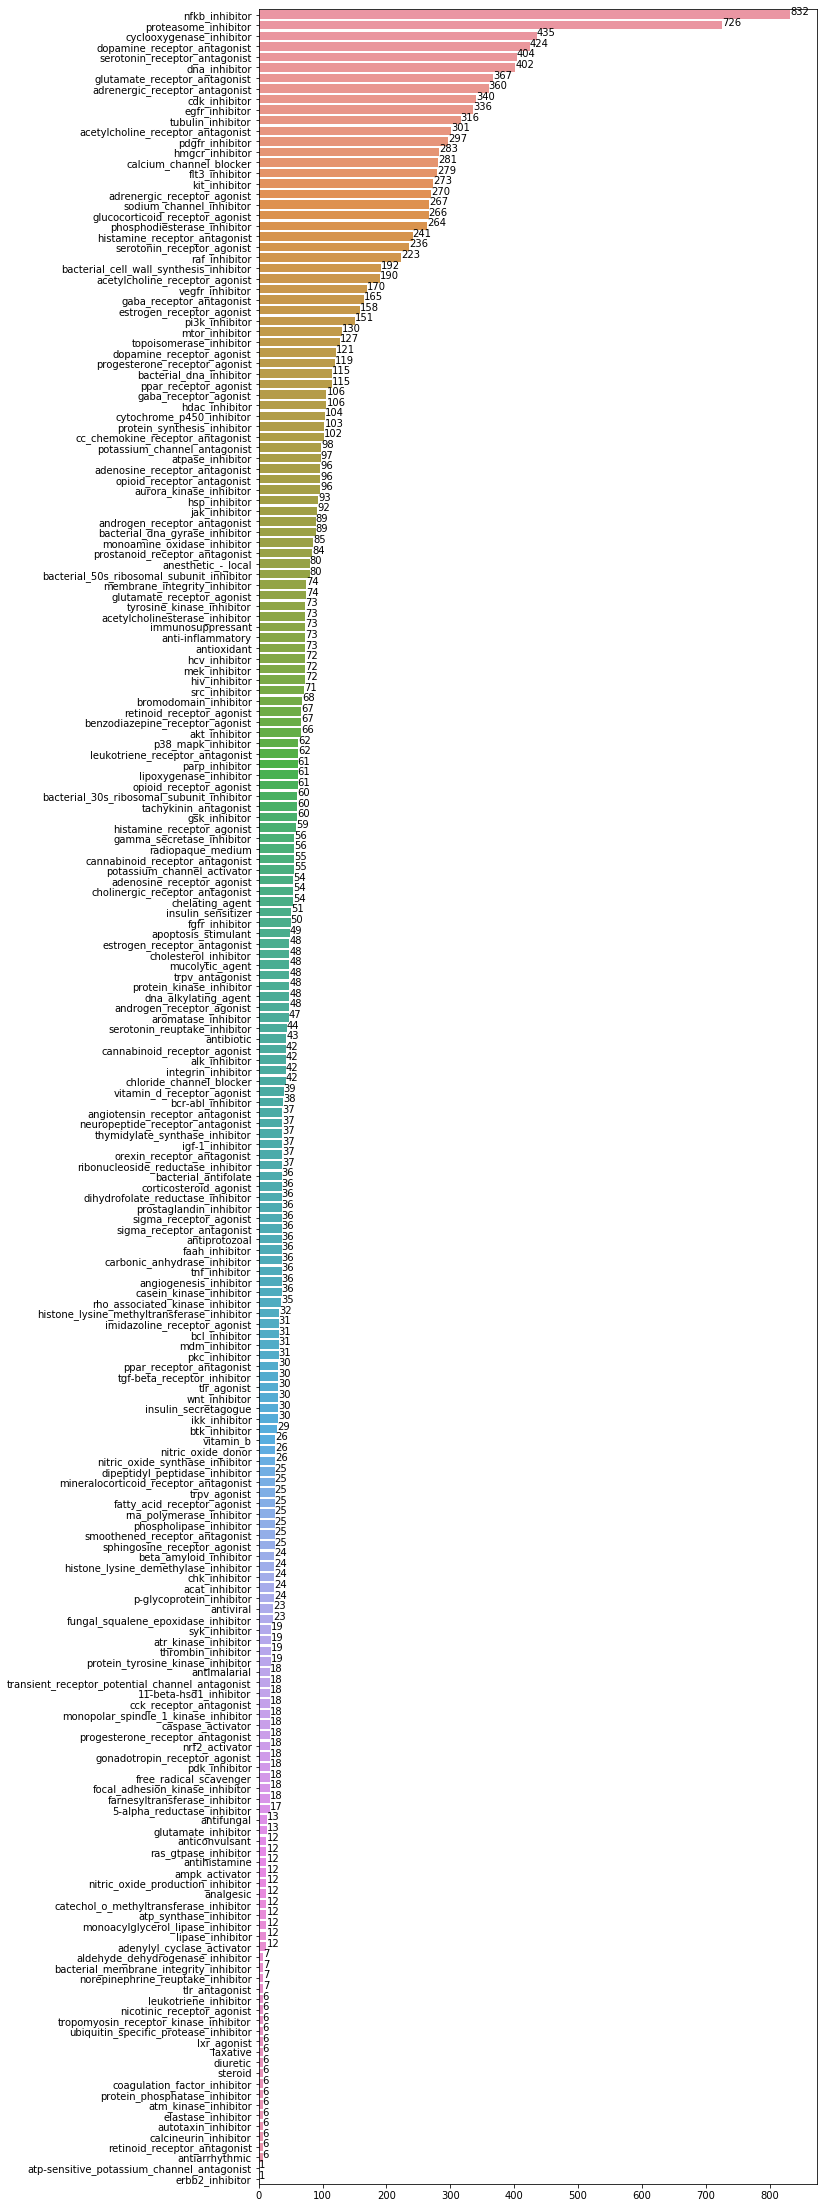

In [29]:
# sort
idx = np.argsort(-count)

plt.figure(figsize=(15, 35))

plt.figure(figsize=(10, 40))
ax = sns.barplot(x=count[idx], y=np.array(y_keys)[idx])

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height / 2
    ax.annotate(int(count[idx[i]]), (x, y))
plt.show()

# {x: int(y) for x, y in zip(np.array(y_keys)[idx], count[idx])}

In [30]:
# labels for 'ctl_vehicle' are all 0.
trn_feature[trn_feature.cp_type == 'ctl_vehicle']
trn_df = trn_feature.merge(trn_tar_df, on='sig_id')    
all(trn_df[trn_df.cp_type == 'ctl_vehicle'][y_keys] == 0)

True

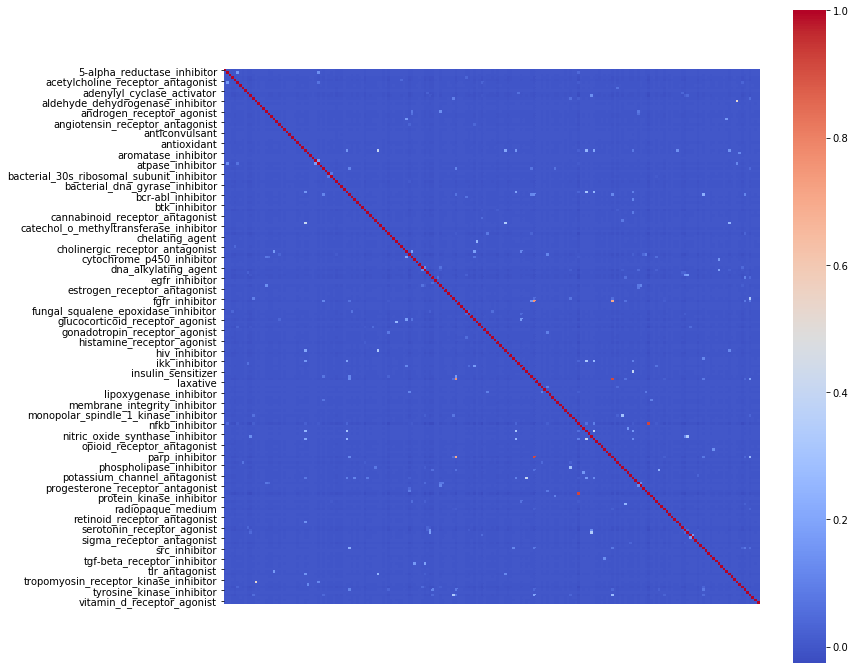

In [31]:
# label correlation
plt.figure(figsize=(12, 12))
sns.heatmap(trn_tar_df.corr(),
            annot=False,
            square=True,
            cmap='coolwarm',
            xticklabels=False)  

# metric

In [32]:
def metric(preds, ys):
    esp = 1e-15
    preds = np.clip(preds, esp, 1 - esp)
    score = -np.mean(np.mean(ys * np.log(preds) + (1 - ys) * np.log(1 - preds),
                             axis=1), axis=0)
    return score

In [33]:
preds_list = [
    np.array([[0, 1, 0], [0, 0, 0], [1, 1, 1], [0, 1, 1]]),
    np.array([[1, 1, 0], [0, 0, 0], [1, 1, 1], [0, 1, 1]]),
    np.array([[1, 0, 1], [1, 1, 1], [0, 0, 0], [1, 0, 0]]),
    np.array([[0, 1, 0], [0.1, 0.1, 0.1], [1, 1, 1], [0, 1, 1]]),
    np.array([[0.1, 0.9, 0.1], [0.1, 0.1, 0.1], [0.9, 0.9, 0.9],
              [0.1, 0.9, 0.9]])
]

ys = np.array([[0, 1, 0], [0, 0, 0], [1, 1, 1], [0, 1, 1]])

In [34]:
for preds in preds_list:
    print(metric(preds, ys))

9.992007221626415e-16
2.8782979993617412
34.53917619362578
0.02634012891445732
0.10536051565782628


In [35]:
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import label_ranking_loss

metrics_list = [
    coverage_error, label_ranking_average_precision_score, label_ranking_loss
]

for m in metrics_list:
    print(m.__name__, ':')
    for preds in preds_list:
        print(m(ys, preds))
    print()

coverage_error :
1.5
1.75
2.25
1.5
1.5

label_ranking_average_precision_score :
1.0
0.875
0.7499999999999999
1.0
1.0

label_ranking_loss :
0.0
0.125
0.5
0.0
0.0



In [36]:
from sklearn.metrics import f1_score
for preds in preds_list:
    print(f1_score(ys, preds > 0.5, average='micro'))

1.0
0.923076923076923
0.0
1.0
1.0


In [37]:
from sklearn.metrics import multilabel_confusion_matrix
for preds in preds_list:
    print(multilabel_confusion_matrix(ys, preds>0.5))
    print('/********/')

[[[3 0]
  [0 1]]

 [[1 0]
  [0 3]]

 [[2 0]
  [0 2]]]
/********/
[[[2 1]
  [0 1]]

 [[1 0]
  [0 3]]

 [[2 0]
  [0 2]]]
/********/
[[[0 3]
  [1 0]]

 [[0 1]
  [3 0]]

 [[0 2]
  [2 0]]]
/********/
[[[3 0]
  [0 1]]

 [[1 0]
  [0 3]]

 [[2 0]
  [0 2]]]
/********/
[[[3 0]
  [0 1]]

 [[1 0]
  [0 3]]

 [[2 0]
  [0 2]]]
/********/


# adversarial validation

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
# prepare adversarial validation data
trn_df = trn_df[trn_df.cp_type !='ctl_vehicle'].reset_index(drop=True)
test_df = test_df[test_df.cp_type !='ctl_vehicle'].reset_index(drop=True)
print(trn_df.shape, test_df.shape)

# label column keys
y_keys = list(trn_tar_df.keys())[1:];

# numerical col
genes = [col for col in trn_feature.columns if col.startswith('g-')]
cells = [col for col in trn_feature.columns if col.startswith('c-')]

# catgoriacal col
cat_col = ['cp_time', 'cp_dose']

# feature
cat_features = ['cp_time', 'cp_dose']
feature_cols = genes + cells + cat_features


# encode catgorical feature
def cate2num(df):
    df['cp_time'] = df['cp_time'].map({24: 0, 48: 1, 72: 2})
    df['cp_dose'] = df['cp_dose'].map({'D1': 1, 'D2': 0})
    return df

trn_df = cate2num(trn_df)
test_df = cate2num(test_df)

# create dataset
xs = np.vstack([trn_df[feature_cols], test_df[feature_cols]])
ys = np.hstack([np.ones((len(trn_df), )), np.zeros((len(test_df),))])

(21948, 1082) (3624, 876)


In [40]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
model.fit(xs, ys)

preds = model.predict(xs)
print(roc_auc_score(ys, preds))

0.500551876379691


In [41]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=False)
model.fit(xs, ys)

preds = model.predict(xs)
print(roc_auc_score(ys, preds))

0.5594646799116998


## with lgm

In [42]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(xs, ys)

preds = model.predict(xs)
print(roc_auc_score(ys, preds))

0.5667770419426048


feature more importance, distribution more different between train and set

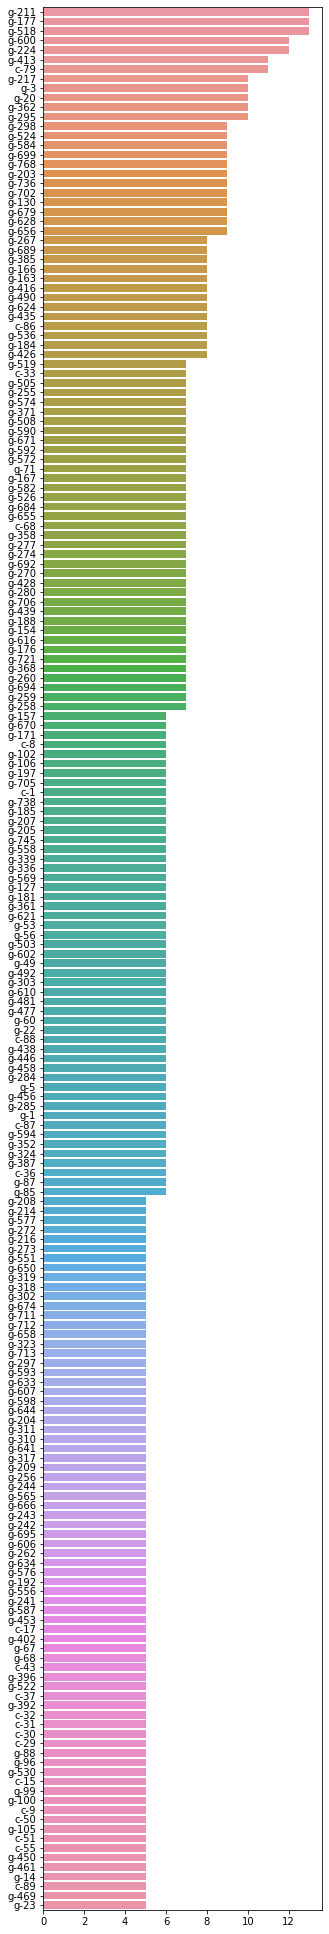

In [43]:
nums = 200

index = np.argsort(-model.feature_importances_)  # argsort by descent

plt.figure(figsize=(5, 35))
sns.barplot(x=model.feature_importances_[index][:nums], y=np.array(feature_cols)[index][:nums])

Training set and testing are almost in same distribution

# Variance Threshold

- numerical feature
- low variance contain low information
- use all dataframe

In [57]:
all_df = pd.concat([trn_df[feature_cols], test_df[feature_cols]],
                   axis=0,
                   ignore_index=True)

var_df = {}
for feature in feature_cols:
    var_df[feature] = all_df[feature].var()

var_df = pd.DataFrame.from_dict(var_df, orient='index', columns=['Variance'])
var_df.sort_values(by='Variance', ascending=True, inplace=True)
var_df.head(50)

Variance
cp_dose  0.249910
g-219    0.334785
g-307    0.371492
g-104    0.381743
g-550    0.388753
g-331    0.409793
g-481    0.424843
g-435    0.430876
g-15     0.432261
g-536    0.461037
g-611    0.483097
g-756    0.508954
g-718    0.523351
g-184    0.534547
g-18     0.558219
g-23     0.577119
g-153    0.583974
g-687    0.585424
g-340    0.600244
g-216    0.600646
g-303    0.624783
g-1      0.640887
g-560    0.642780
g-21     0.644238
cp_time  0.653748
g-382    0.661657
g-583    0.665329
g-420    0.667642
g-262    0.671366
g-267    0.675499
g-292    0.682279
g-552    0.686245
g-94     0.688087
g-279    0.689203
g-404    0.689579
g-507    0.693072
g-454    0.695432
g-193    0.701502
g-19     0.704647
g-581    0.707420
g-274    0.710193
g-268    0.717517
g-754    0.718356
g-485    0.724287
g-633    0.726874
g-542    0.728397
g-345    0.728642
g-78     0.729599
g-472    0.734446
g-396    0.743558